# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Chaitanya Kukreja
**Email:** cak10000@nyu.edu

---

In [1]:
# Imports
# -------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Helper to print section headers nicely
def header(title):
    print("\n" + "="*len(title))
    print(title)
    print("="*len(title))


### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [5]:
print("""
Good splitting strategy:
- Split by speaker, not by random clip.
  Train speakers, Validation speakers, Test speakers = disjoint sets.
  e.g. 60% speakers → train, 20% → val, 20% → test.
  This ensures generalization to *new speakers* (like Kilian).

For the new 10,000 clips from 'Kilian':
- Since Kilian’s voice was unseen, treat these as new-domain data.
  Options:
  1. Evaluate directly → to test generalization.
  2. Fine-tune small adapter layers on part of Kilian’s data (80/10/10 split).
  3. Or train a new model mixing original + Kilian data with speaker weighting.

""")


Good splitting strategy:
- Split by speaker, not by random clip.
  Train speakers, Validation speakers, Test speakers = disjoint sets.
  e.g. 60% speakers → train, 20% → val, 20% → test.
  This ensures generalization to *new speakers* (like Kilian).

For the new 10,000 clips from 'Kilian':
- Since Kilian’s voice was unseen, treat these as new-domain data.
  Options:
  1. Evaluate directly → to test generalization.
  2. Fine-tune small adapter layers on part of Kilian’s data (80/10/10 split).
  3. Or train a new model mixing original + Kilian data with speaker weighting.




### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?



Problem 2 – K-NN decision boundary and feature scaling


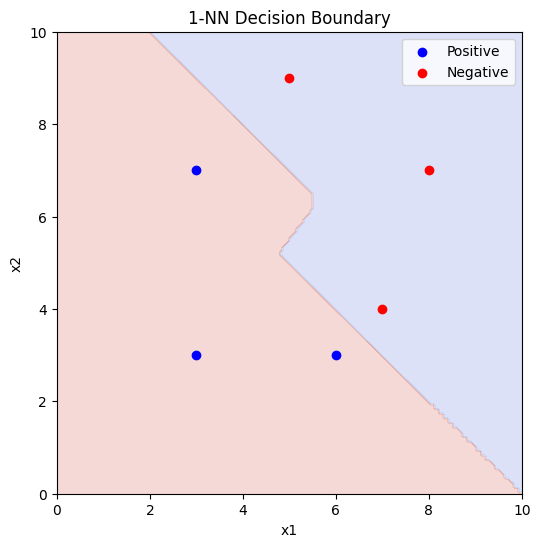


--- (b) Effect of Feature Scaling ---
Prediction before scaling: 0
Prediction after scaling: 0

Explanation:
Without scaling, the first feature (500) dominates distance computation.
After min–max normalization to [0,1], both features contribute equally.
So the nearest neighbor — and thus classification — may change.


--- (c) Handling missing features in K-NN ---
Use one of:
1. Impute missing values (mean/median per feature).
2. Compute distances only on non-missing dimensions (masked distance).
3. Use KNNImputer in scikit-learn.

--- (d) Why KNN can work for images ---
Images are flattened into vectors or represented by feature embeddings (e.g. from CNNs).
Distances then capture visual similarity, enabling KNN to classify image classes.



In [6]:
header("Problem 2 – K-NN decision boundary and feature scaling")

# (a) Visualize 1-NN decision boundary for given points
pos = np.array([[3,7],[3,3],[6,3]])
neg = np.array([[7,4],[8,7],[5,9]])

# Plotting decision regions for 1-NN
X_train = np.vstack([pos, neg])
y_train = np.array([1]*len(pos) + [0]*len(neg))
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

x_min, x_max = 0, 10
y_min, y_max = 0, 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(pos[:,0], pos[:,1], color='blue', label='Positive')
plt.scatter(neg[:,0], neg[:,1], color='red', label='Negative')
plt.title("1-NN Decision Boundary")
plt.legend()
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

# (b) Classification of (500,1) before/after scaling
print("\n--- (b) Effect of Feature Scaling ---")

# Define dataset
X = np.array([[1,1],[500,1],[1,500],[500,500]])
y = np.array([1,0,0,1])  # arbitrary labels
test_point = np.array([[500,1]])

# 1-NN before scaling
knn_raw = KNeighborsClassifier(n_neighbors=1).fit(X, y)
pred_raw = knn_raw.predict(test_point)[0]
print(f"Prediction before scaling: {pred_raw}")

# 1-NN after min-max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_point)
knn_scaled = KNeighborsClassifier(n_neighbors=1).fit(X_scaled, y)
pred_scaled = knn_scaled.predict(test_scaled)[0]
print(f"Prediction after scaling: {pred_scaled}")

print("""
Explanation:
Without scaling, the first feature (500) dominates distance computation.
After min–max normalization to [0,1], both features contribute equally.
So the nearest neighbor — and thus classification — may change.
""")

print("""
--- (c) Handling missing features in K-NN ---
Use one of:
1. Impute missing values (mean/median per feature).
2. Compute distances only on non-missing dimensions (masked distance).
3. Use KNNImputer in scikit-learn.

--- (d) Why KNN can work for images ---
Images are flattened into vectors or represented by feature embeddings (e.g. from CNNs).
Distances then capture visual similarity, enabling KNN to classify image classes.
""")


### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [7]:
header("Problem 3 – Perceptron")

print("""
(a) Evaluating 'sign(w·x)' on training vs. test set:
- On training data: shows if Perceptron learned to separate correctly.
- On test data: measures generalization to unseen examples.
We rarely recompute training error repeatedly because Perceptron
updates only on mistakes — it keeps improving until convergence.
""")

# (b) Two-point dataset
pos = np.array([[10, -2]])
neg = np.array([[12, 2]])
X = np.vstack([pos, neg])
y = np.array([1, -1])
w = np.zeros(2)
lr = 1

weights = [w.copy()]
converged = False
epoch = 0
while not converged and epoch < 20:
    converged = True
    for xi, yi in zip(X, y):
        if yi * np.dot(w, xi) <= 0:
            w = w + lr * yi * xi
            weights.append(w.copy())
            converged = False
    epoch += 1

print("Weight sequence:")
for i, wv in enumerate(weights):
    print(f"Update {i}: w = {wv}")
print(f"Total updates: {len(weights)-1}")


Problem 3 – Perceptron

(a) Evaluating 'sign(w·x)' on training vs. test set:
- On training data: shows if Perceptron learned to separate correctly.
- On test data: measures generalization to unseen examples.
We rarely recompute training error repeatedly because Perceptron 
updates only on mistakes — it keeps improving until convergence.

Weight sequence:
Update 0: w = [0. 0.]
Update 1: w = [10. -2.]
Update 2: w = [-2. -4.]
Update 3: w = [ 8. -6.]
Update 4: w = [-4. -8.]
Update 5: w = [  6. -10.]
Update 6: w = [ -6. -12.]
Update 7: w = [  4. -14.]
Update 8: w = [ -8. -16.]
Update 9: w = [  2. -18.]
Total updates: 9


### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [10]:
import numpy as np

# Data
X = np.array([[10, -2], [12, 2]])
y = np.array([1, -1])
w = np.zeros(2)
lr = 1

weights = [w.copy()]
for epoch in range(6):  # show first few updates
    for xi, yi in zip(X, y):
        if yi * np.dot(w, xi) <= 0:
            w = w + lr * yi * xi
            weights.append(w.copy())

print("Weight updates:")
for i, wv in enumerate(weights):
    print(f"w{i} = {wv}")

print("\nConclusion: The dataset is not linearly separable, "
      "so the Perceptron never converges—it keeps oscillating.")

Weight updates:
w0 = [0. 0.]
w1 = [10. -2.]
w2 = [-2. -4.]
w3 = [ 8. -6.]
w4 = [-4. -8.]
w5 = [  6. -10.]
w6 = [ -6. -12.]
w7 = [  4. -14.]
w8 = [ -8. -16.]
w9 = [  2. -18.]

Conclusion: The dataset is not linearly separable, so the Perceptron never converges—it keeps oscillating.


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [8]:
header("Problem 4 – Reconstructing Weight Vector")

print("""
Given perceptron log:
learning rate = 1
initial weights = (0,0)
Data:
x1 = (3,3), y1 = +1
x2 = (1,1), y2 = -1
x3 = (2,2), y3 = +1

Assume updates occurred when misclassified.

Let's reconstruct programmatically:
""")

X = np.array([[3,3],[1,1],[2,2]])
y = np.array([1,-1,1])
w = np.zeros(2)
lr = 1

for xi, yi in zip(X, y):
    if yi * np.dot(w, xi) <= 0:
        w = w + lr * yi * xi

print(f"Final weight vector: {w}")


Problem 4 – Reconstructing Weight Vector

Given perceptron log:
learning rate = 1
initial weights = (0,0)
Data:
x1 = (3,3), y1 = +1
x2 = (1,1), y2 = -1
x3 = (2,2), y3 = +1

Assume updates occurred when misclassified.

Let's reconstruct programmatically:

Final weight vector: [2. 2.]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.


Problem 5 – Visualizing Perceptron Convergence


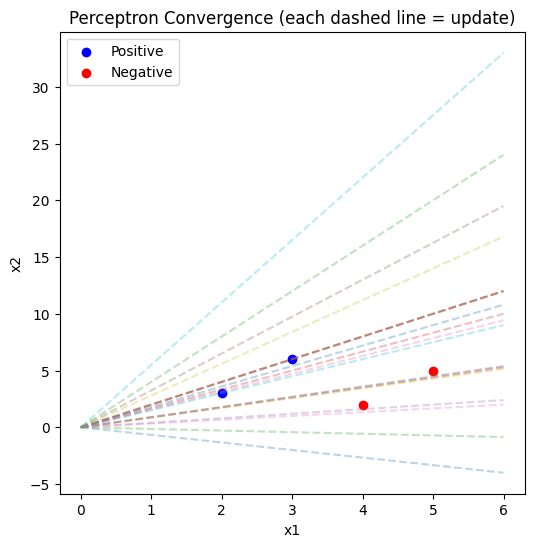


Each dashed line shows how the decision boundary shifts after an update.
Eventually, the updates stop (convergence) once all points are correctly classified.



In [9]:
header("Problem 5 – Visualizing Perceptron Convergence")

# Small 2D dataset
X = np.array([[2,3],[4,2],[3,6],[5,5]])
y = np.array([1,-1,1,-1])
w = np.zeros(2)
lr = 1
weights = [w.copy()]

for epoch in range(10):
    for xi, yi in zip(X, y):
        if yi * np.dot(w, xi) <= 0:
            w = w + lr * yi * xi
            weights.append(w.copy())

# Plot data
plt.figure(figsize=(6,6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Positive')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red', label='Negative')

# Plot decision boundaries for each update
x_vals = np.linspace(0,6,100)
for i, wv in enumerate(weights):
    if wv[1] != 0:
        y_vals = -(wv[0]/wv[1])*x_vals
        plt.plot(x_vals, y_vals, '--', alpha=0.3)

plt.title("Perceptron Convergence (each dashed line = update)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend()
plt.show()

print("""
Each dashed line shows how the decision boundary shifts after an update.
Eventually, the updates stop (convergence) once all points are correctly classified.
""")